In [745]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
import datetime
from geopy import distance
warnings.filterwarnings('ignore')

# importing dataset

In [746]:
df = pd.read_csv('YourCabs.csv')
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [747]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43431 entries, 0 to 43430
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   43431 non-null  int64  
 1   user_id              43431 non-null  int64  
 2   vehicle_model_id     43431 non-null  int64  
 3   package_id           7550 non-null   float64
 4   travel_type_id       43431 non-null  int64  
 5   from_area_id         43343 non-null  float64
 6   to_area_id           34293 non-null  float64
 7   from_city_id         16345 non-null  float64
 8   to_city_id           1588 non-null   float64
 9   from_date            43431 non-null  object 
 10  online_booking       43431 non-null  int64  
 11  mobile_site_booking  43431 non-null  int64  
 12  booking_created      43431 non-null  object 
 13  from_lat             43338 non-null  float64
 14  from_long            43338 non-null  float64
 15  to_lat               34293 non-null 

In [748]:
#Column id has unique values 
#Column user_id contains PII (Personal Information Identifier) which would be of no use while training the model 
#Column vehicle_model_id has 73% of the values as '12' so keeping it will introduce a bias

# So we will drop all these columns

df.drop(columns = ['id', 'user_id', 'vehicle_model_id'], inplace=True)

df.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0


In [749]:
'''Split the data into 3 parts: travel_type_id = 1, travel_type_id = 2 and travel_type_id = 3 as each travel type id has some columns required and some are not required
And create 3 ML models for each travel type id.'''

df1 = df[df['travel_type_id']==1]
df2 = df[df['travel_type_id']==2]
df3 = df[df['travel_type_id']==3]

# Travel type id 1

In [750]:
df1.head()

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
6,NaN,1,571.0,NaN,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,NaN,NaN,0
17,NaN,1,1383.0,NaN,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,NaN,NaN,0
24,NaN,1,515.0,NaN,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,NaN,NaN,0
158,NaN,1,136.0,NaN,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,NaN,NaN,0
216,NaN,1,1118.0,NaN,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,NaN,NaN,0


In [751]:
df1.isnull().sum()

package_id             1589
travel_type_id            0
from_area_id             88
to_area_id             1588
from_city_id            196
to_city_id                1
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 93
from_long                93
to_lat                 1588
to_long                1588
Car_Cancellation          0
dtype: int64

In [752]:
# In df1 containing travel_type_id = 1, as it is a long distance or intercity travel, the columns package_id, to_area_id, to_lat and to_long will have null values only so need to drop these columns
# We can also delete the column travel_type_id as it is the same for this dataset
df1.drop(columns = ['package_id', 'to_area_id', 'to_lat', 'to_long', 'travel_type_id'], inplace=True)
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,12.951850,77.696420,0
17,1383.0,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,12.930451,77.685822,0
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,12.978960,77.673450,0
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,12.907960,77.624180,0
216,1118.0,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,12.930220,77.560390,0


In [929]:
df1.dtypes

from_area_id               float64
to_city_id                 float64
online_booking               int64
mobile_site_booking          int64
Car_Cancellation             int64
from_date_session           object
booking_created_session     object
time_diff_minutes          float64
dtype: object

In [925]:
sns.heatmap(df1.corr(), annot = True, cmap = 'RdYlGn')

ValueError: could not convert string to float: 'Morning'

In [754]:
# From the above correlation matrix, we can observe that from_area_id is in high correlation with from_lat and from_long so need to drop the latter 2 columns due to multi colinearity

df1.drop(columns = ['from_lat', 'from_long'], inplace = True)
df1.head()

,from_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
6,571.0,15.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0
17,1383.0,NaN,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0
24,515.0,15.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0
158,136.0,1.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0
216,1118.0,NaN,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0


In [755]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         1501 non-null   float64
 1   from_city_id         1393 non-null   float64
 2   to_city_id           1588 non-null   float64
 3   from_date            1589 non-null   object 
 4   online_booking       1589 non-null   int64  
 5   mobile_site_booking  1589 non-null   int64  
 6   booking_created      1589 non-null   object 
 7   Car_Cancellation     1589 non-null   int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 111.7+ KB


# missing value treatment

In [756]:
print((df1['from_area_id'].isnull().sum())*100/df1.shape[0]) # % of NaN values in from_area_id column

# As the missing value % is almost 5% we will treat it by replacing it with the mean

df1['from_area_id'] = df1['from_area_id'].fillna(df1['from_area_id'].mean())

print((df1['from_city_id'].isnull().sum())*100/df1.shape[0]) # % of NaN values in from_city_id column

# Since this column contains more than 10% of missing values, we will drop this column

df1.drop(columns = 'from_city_id', inplace = True)

print((df1['to_city_id'].isnull().sum())*100/df1.shape[0]) # % of NaN values in from_area_id column

# As the missing value % is less than 5% we will treat it by replacing it with the mean

df1['to_city_id'] = df1['to_city_id'].fillna(df1['to_city_id'].mean())

5.5380742605412205
12.334801762114537
0.06293266205160478


In [757]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1589 entries, 6 to 43407
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         1589 non-null   float64
 1   to_city_id           1589 non-null   float64
 2   from_date            1589 non-null   object 
 3   online_booking       1589 non-null   int64  
 4   mobile_site_booking  1589 non-null   int64  
 5   booking_created      1589 non-null   object 
 6   Car_Cancellation     1589 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 99.3+ KB


In [758]:
df1.head()

,from_area_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
6,571.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0
17,1383.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0
24,515.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0
158,136.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0
216,1118.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0


# Extracting date and time 

In [759]:
df1['from_time_tm'] = pd.to_datetime(df1['from_date'],format='mixed').dt.strftime('%H:%M') # extracting time component from from_date column
df1['booking_created_tm'] = pd.to_datetime(df1['booking_created'],format='mixed').dt.strftime('%H:%M') # extracting time component from booking_created column

# Classifying the time into different segments for both the columns

cond = [(pd.to_datetime(df1['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(df1['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(df1['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(df1['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(df1['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(df1['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(df1['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
df1['from_date_session'] = np.select(cond,values)

cond = [(pd.to_datetime(df1['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(df1['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(df1['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(df1['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(df1['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(df1['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(df1['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
df1['booking_created_session'] = np.select(cond,values)

In [760]:
# creating a new column which calculates the time difference between booking time and scheduled travel time

df1['time_diff'] = (pd.to_datetime(df1['from_date'],format='mixed') - pd.to_datetime(df1['booking_created'],format='mixed'))
df1['time_diff_minutes'] = df1['time_diff'].dt.total_seconds() / 60

In [761]:
df1

,from_area_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation,from_time_tm,booking_created_tm,from_date_session,booking_created_session,time_diff,time_diff_minutes
6,571.0,108.0,01-01-2013 09:45,0,0,01-01-2013 09:21,0,09:45,09:21,Morning,Morning,0 days 00:24:00,24.0
17,1383.0,32.0,01-12-2013 08:00,1,0,01-01-2013 12:17,0,08:00,12:17,Early Morning,Morning,10 days 19:43:00,15583.0
24,515.0,32.0,01-05-2013 08:30,0,0,01-01-2013 14:40,0,08:30,14:40,Early Morning,Afternoon,3 days 17:50:00,5390.0
158,136.0,152.0,01-04-2013 09:30,1,0,01-03-2013 12:19,0,09:30,12:19,Morning,Morning,0 days 21:11:00,1271.0
216,1118.0,32.0,01-06-2013 07:30,1,0,01-04-2013 09:32,0,07:30,09:32,Early Morning,Morning,1 days 21:58:00,2758.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43342,393.0,191.0,11/23/2013 22:00,1,0,11/23/2013 17:54,0,22:00,17:54,Night,Evening,0 days 04:06:00,246.0
43385,119.0,146.0,11/29/2013 14:00,1,0,11/23/2013 23:24,0,14:00,23:24,Afternoon,Night,5 days 14:36:00,8076.0
43386,1281.0,32.0,11/24/2013 7:30,1,0,11/23/2013 23:44,0,07:30,23:44,Early Morning,Night,0 days 07:46:00,466.0
43393,393.0,116.0,11/24/2013 10:30,0,0,11/24/2013 7:14,0,10:30,07:14,Morning,Early Morning,0 days 03:16:00,196.0


In [762]:

# dropping some columns from the data

df1.drop(columns = ['from_date', 'booking_created', 'from_time_tm', 'booking_created_tm','time_diff'], inplace = True)

In [763]:
df1

,from_area_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,from_date_session,booking_created_session,time_diff_minutes
6,571.0,108.0,0,0,0,Morning,Morning,24.0
17,1383.0,32.0,1,0,0,Early Morning,Morning,15583.0
24,515.0,32.0,0,0,0,Early Morning,Afternoon,5390.0
158,136.0,152.0,1,0,0,Morning,Morning,1271.0
216,1118.0,32.0,1,0,0,Early Morning,Morning,2758.0
...,...,...,...,...,...,...,...,...
43342,393.0,191.0,1,0,0,Night,Evening,246.0
43385,119.0,146.0,1,0,0,Afternoon,Night,8076.0
43386,1281.0,32.0,1,0,0,Early Morning,Night,466.0
43393,393.0,116.0,0,0,0,Morning,Early Morning,196.0


# EDA

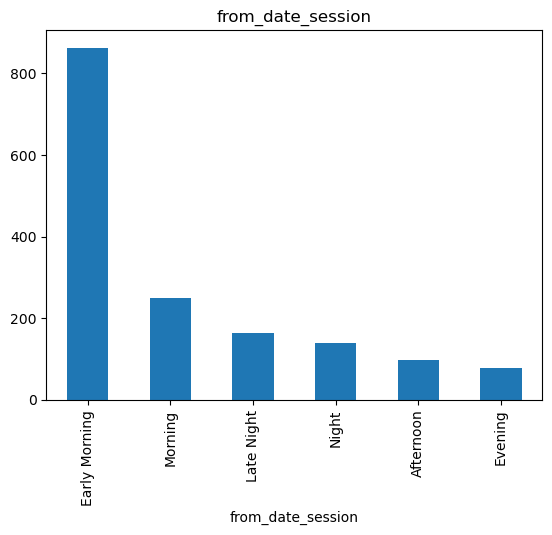

In [764]:
df1['from_date_session'].value_counts().plot.bar()
plt.title('from_date_session')
plt.show()

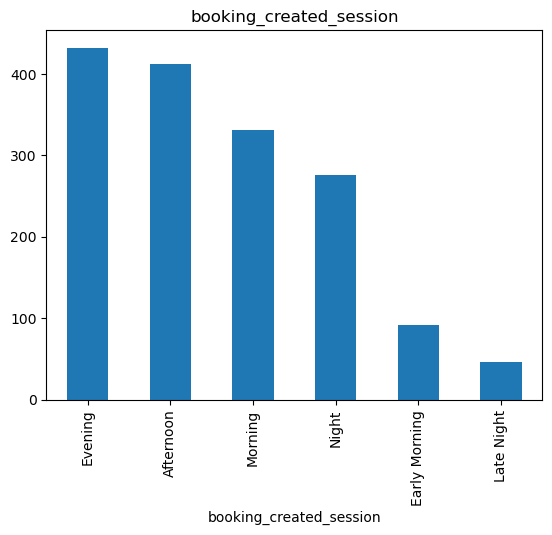

In [765]:
df1['booking_created_session'].value_counts().plot.bar()
plt.title('booking_created_session')
plt.show()

In [766]:
df1

,from_area_id,to_city_id,online_booking,mobile_site_booking,Car_Cancellation,from_date_session,booking_created_session,time_diff_minutes
6,571.0,108.0,0,0,0,Morning,Morning,24.0
17,1383.0,32.0,1,0,0,Early Morning,Morning,15583.0
24,515.0,32.0,0,0,0,Early Morning,Afternoon,5390.0
158,136.0,152.0,1,0,0,Morning,Morning,1271.0
216,1118.0,32.0,1,0,0,Early Morning,Morning,2758.0
...,...,...,...,...,...,...,...,...
43342,393.0,191.0,1,0,0,Night,Evening,246.0
43385,119.0,146.0,1,0,0,Afternoon,Night,8076.0
43386,1281.0,32.0,1,0,0,Early Morning,Night,466.0
43393,393.0,116.0,0,0,0,Morning,Early Morning,196.0


In [767]:
x1 = df1.drop(columns = 'Car_Cancellation')
x1.head()

,from_area_id,to_city_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes
6,571.0,108.0,0,0,Morning,Morning,24.0
17,1383.0,32.0,1,0,Early Morning,Morning,15583.0
24,515.0,32.0,0,0,Early Morning,Afternoon,5390.0
158,136.0,152.0,1,0,Morning,Morning,1271.0
216,1118.0,32.0,1,0,Early Morning,Morning,2758.0


In [768]:
y1 = df1['Car_Cancellation']
y1.head()

6      0
17     0
24     0
158    0
216    0
Name: Car_Cancellation, dtype: int64

In [769]:
y1.value_counts()

Car_Cancellation
0    1568
1      21
Name: count, dtype: int64

In [770]:
# here the target class is biased so we need to pass stratify argument while splitting the data
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x1,y1,train_size=0.85,random_state=30, stratify=y1)
xtrain1

,from_area_id,to_city_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes
19818,1166.0,65.0,1,0,Afternoon,Afternoon,13076.0
18554,585.0,55.0,0,0,Early Morning,Morning,1241.0
19385,585.0,32.0,1,0,Early Morning,Afternoon,907.0
43250,393.0,64.0,0,0,Morning,Evening,3650.0
19694,105.0,192.0,1,0,Early Morning,Early Morning,2803.0
...,...,...,...,...,...,...,...
20676,1102.0,17.0,0,0,Morning,Early Morning,62.0
37840,1164.0,147.0,1,0,Early Morning,Morning,1168.0
31662,689.0,191.0,1,0,Early Morning,Afternoon,940.0
1017,466.0,108.0,0,0,Early Morning,Late Night,141.0


In [771]:
xtest1

,from_area_id,to_city_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes
10833,455.0,146.0,1,0,Evening,Evening,5735.0
19114,1153.0,110.0,1,0,Early Morning,Night,1952.0
29007,293.0,146.0,0,0,Night,Afternoon,468.0
34062,393.0,32.0,1,0,Morning,Afternoon,4278.0
20450,1013.0,146.0,0,0,Afternoon,Morning,99.0
...,...,...,...,...,...,...,...
37662,396.0,32.0,1,0,Morning,Early Morning,299.0
8352,1333.0,32.0,0,0,Early Morning,Night,444.0
1314,87.0,32.0,1,0,Early Morning,Evening,2322.0
20092,571.0,32.0,0,0,Early Morning,Morning,1222.0


In [772]:
from sklearn.preprocessing import MinMaxScaler
m2s = MinMaxScaler()

In [773]:
xtrain1['time_diff_minutes'] = m2s.fit_transform(xtrain1[['time_diff_minutes']])
xtrain1.head()

,from_area_id,to_city_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes
19818,1166.0,65.0,1,0,Afternoon,Afternoon,0.199333
18554,585.0,55.0,0,0,Early Morning,Morning,0.019797
19385,585.0,32.0,1,0,Early Morning,Afternoon,0.014730
43250,393.0,64.0,0,0,Morning,Evening,0.056341
19694,105.0,192.0,1,0,Early Morning,Early Morning,0.043492


In [774]:
xtest1['time_diff_minutes'] = m2s.transform(xtest1[['time_diff_minutes']])
xtest1.head()

,from_area_id,to_city_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes
10833,455.0,146.0,1,0,Evening,Evening,0.087970
19114,1153.0,110.0,1,0,Early Morning,Night,0.030583
29007,293.0,146.0,0,0,Night,Afternoon,0.008070
34062,393.0,32.0,1,0,Morning,Afternoon,0.065868
20450,1013.0,146.0,0,0,Afternoon,Morning,0.002473


In [775]:
# One-hot encoding for the columns from_date_session and booking_created_session

from_date_dummy = pd.get_dummies(xtrain1['from_date_session'], drop_first=True)
from_date_dummy = from_date_dummy.astype(int)
from_date_dummy

,Early Morning,Evening,Late Night,Morning,Night
19818,0,0,0,0,0
18554,1,0,0,0,0
19385,1,0,0,0,0
43250,0,0,0,1,0
19694,1,0,0,0,0
...,...,...,...,...,...
20676,0,0,0,1,0
37840,1,0,0,0,0
31662,1,0,0,0,0
1017,1,0,0,0,0


In [776]:
xtrain1['Early_Morning'] = from_date_dummy['Early Morning']
xtrain1['Evening'] = from_date_dummy['Evening']
xtrain1['Late_Night'] = from_date_dummy['Late Night']
xtrain1['Morning'] = from_date_dummy['Morning']
xtrain1['Night'] = from_date_dummy['Night']
del xtrain1['from_date_session']

In [777]:
booking_created_dummy = pd.get_dummies(xtrain1['booking_created_session'], drop_first=True)
booking_created_dummy = booking_created_dummy.astype(int)
booking_created_dummy

,Early Morning,Evening,Late Night,Morning,Night
19818,0,0,0,0,0
18554,0,0,0,1,0
19385,0,0,0,0,0
43250,0,1,0,0,0
19694,1,0,0,0,0
...,...,...,...,...,...
20676,1,0,0,0,0
37840,0,0,0,1,0
31662,0,0,0,0,0
1017,0,0,1,0,0


In [778]:
xtrain1['Early_Morning_booking'] = booking_created_dummy['Early Morning']
xtrain1['Evening_booking'] = booking_created_dummy['Evening']
xtrain1['Late_Night_booking'] = booking_created_dummy['Late Night']
xtrain1['Morning_booking'] = booking_created_dummy['Morning']
xtrain1['Night_booking'] = booking_created_dummy['Night']
del xtrain1['booking_created_session']

In [779]:
xtrain1

,from_area_id,to_city_id,online_booking,mobile_site_booking,time_diff_minutes,Early_Morning,Evening,Late_Night,Morning,Night,Early_Morning_booking,Evening_booking,Late_Night_booking,Morning_booking,Night_booking
19818,1166.0,65.0,1,0,0.199333,0,0,0,0,0,0,0,0,0,0
18554,585.0,55.0,0,0,0.019797,1,0,0,0,0,0,0,0,1,0
19385,585.0,32.0,1,0,0.014730,1,0,0,0,0,0,0,0,0,0
43250,393.0,64.0,0,0,0.056341,0,0,0,1,0,0,1,0,0,0
19694,105.0,192.0,1,0,0.043492,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20676,1102.0,17.0,0,0,0.001911,0,0,0,1,0,1,0,0,0,0
37840,1164.0,147.0,1,0,0.018689,1,0,0,0,0,0,0,0,1,0
31662,689.0,191.0,1,0,0.015231,1,0,0,0,0,0,0,0,0,0
1017,466.0,108.0,0,0,0.003110,1,0,0,0,0,0,0,1,0,0


In [780]:
from_date_dummy_test = pd.get_dummies(xtest1['from_date_session'], drop_first=True)
from_date_dummy_test = from_date_dummy_test.astype(int)
from_date_dummy_test

,Early Morning,Evening,Late Night,Morning,Night
10833,0,1,0,0,0
19114,1,0,0,0,0
29007,0,0,0,0,1
34062,0,0,0,1,0
20450,0,0,0,0,0
...,...,...,...,...,...
37662,0,0,0,1,0
8352,1,0,0,0,0
1314,1,0,0,0,0
20092,1,0,0,0,0


In [781]:
xtest1['Early_Morning'] = from_date_dummy_test['Early Morning']
xtest1['Evening'] = from_date_dummy_test['Evening']
xtest1['Late_Night'] = from_date_dummy_test['Late Night']
xtest1['Morning'] = from_date_dummy_test['Morning']
xtest1['Night'] = from_date_dummy_test['Night']
del xtest1['from_date_session']

In [782]:
booking_created_dummy_test = pd.get_dummies(xtest1['booking_created_session'], drop_first=True)
booking_created_dummy_test = booking_created_dummy_test.astype(int)
booking_created_dummy_test

,Early Morning,Evening,Late Night,Morning,Night
10833,0,1,0,0,0
19114,0,0,0,0,1
29007,0,0,0,0,0
34062,0,0,0,0,0
20450,0,0,0,1,0
...,...,...,...,...,...
37662,1,0,0,0,0
8352,0,0,0,0,1
1314,0,1,0,0,0
20092,0,0,0,1,0


In [783]:
xtest1['Early_Morning_booking'] = booking_created_dummy_test['Early Morning']
xtest1['Evening_booking'] = booking_created_dummy_test['Evening']
xtest1['Late_Night_booking'] = booking_created_dummy_test['Late Night']
xtest1['Morning_booking'] = booking_created_dummy_test['Morning']
xtest1['Night_booking'] = booking_created_dummy_test['Night']
del xtest1['booking_created_session']

In [784]:
xtest1

,from_area_id,to_city_id,online_booking,mobile_site_booking,time_diff_minutes,Early_Morning,Evening,Late_Night,Morning,Night,Early_Morning_booking,Evening_booking,Late_Night_booking,Morning_booking,Night_booking
10833,455.0,146.0,1,0,0.087970,0,1,0,0,0,0,1,0,0,0
19114,1153.0,110.0,1,0,0.030583,1,0,0,0,0,0,0,0,0,1
29007,293.0,146.0,0,0,0.008070,0,0,0,0,1,0,0,0,0,0
34062,393.0,32.0,1,0,0.065868,0,0,0,1,0,0,0,0,0,0
20450,1013.0,146.0,0,0,0.002473,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37662,396.0,32.0,1,0,0.005507,0,0,0,1,0,1,0,0,0,0
8352,1333.0,32.0,0,0,0.007706,1,0,0,0,0,0,0,0,0,1
1314,87.0,32.0,1,0,0.036195,1,0,0,0,0,0,1,0,0,0
20092,571.0,32.0,0,0,0.019508,1,0,0,0,0,0,0,0,1,0


In [785]:
# Logistic Regression

log_reg = LogisticRegression(random_state=0)
log_reg.fit(xtrain1, ytrain1)

LogisticRegression(random_state=0)

In [786]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',random_state=4)

In [787]:
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_dtc = GridSearchCV(dtc, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_dtc.fit(xtrain1, ytrain1)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [788]:
gscv_dtc.best_params_

{'max_depth': 3, 'min_samples_split': 150}

In [789]:
dtc = DecisionTreeClassifier(criterion='gini', random_state = 4, max_depth = 3, min_samples_split = 150)
dtc.fit(xtrain1, ytrain1)

DecisionTreeClassifier(max_depth=3, min_samples_split=150, random_state=4)

In [790]:
ypred_lr =log_reg.predict(xtest1)
ypred_lr

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [791]:
ypred_dtc = dtc.predict(xtest1)
ypred_dtc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [792]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(ytest1, ypred_lr)
conf_matrix

array([[236,   0],
       [  3,   0]], dtype=int64)

<Axes: >

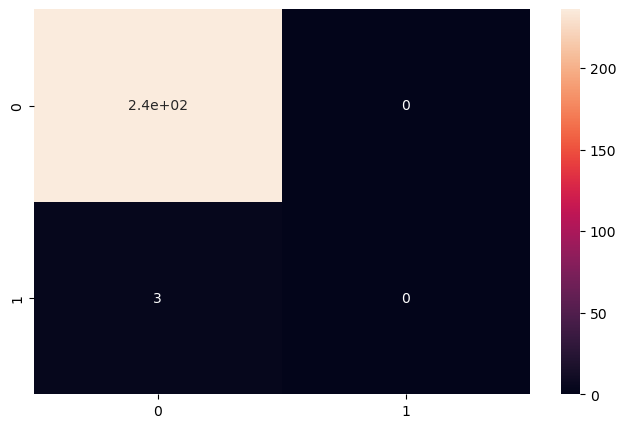

In [793]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)

In [794]:
from sklearn.metrics import classification_report
print("Report for Logistic Regression")
print("______________________________")
print("\n")
print(classification_report(ytest1, ypred_lr))

Report for Logistic Regression
______________________________


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       236
           1       0.00      0.00      0.00         3

    accuracy                           0.99       239
   macro avg       0.49      0.50      0.50       239
weighted avg       0.98      0.99      0.98       239



In [795]:
conf_matrix = confusion_matrix(ytest1, ypred_dtc)
conf_matrix

array([[236,   0],
       [  3,   0]], dtype=int64)

In [796]:
print("Report for Decision Tree Model")
print("______________________________")
print("\n")
print(classification_report(ytest1, ypred_dtc))

Report for Decision Tree Model
______________________________


              precision    recall  f1-score   support

           0       0.99      1.00      0.99       236
           1       0.00      0.00      0.00         3

    accuracy                           0.99       239
   macro avg       0.49      0.50      0.50       239
weighted avg       0.98      0.99      0.98       239



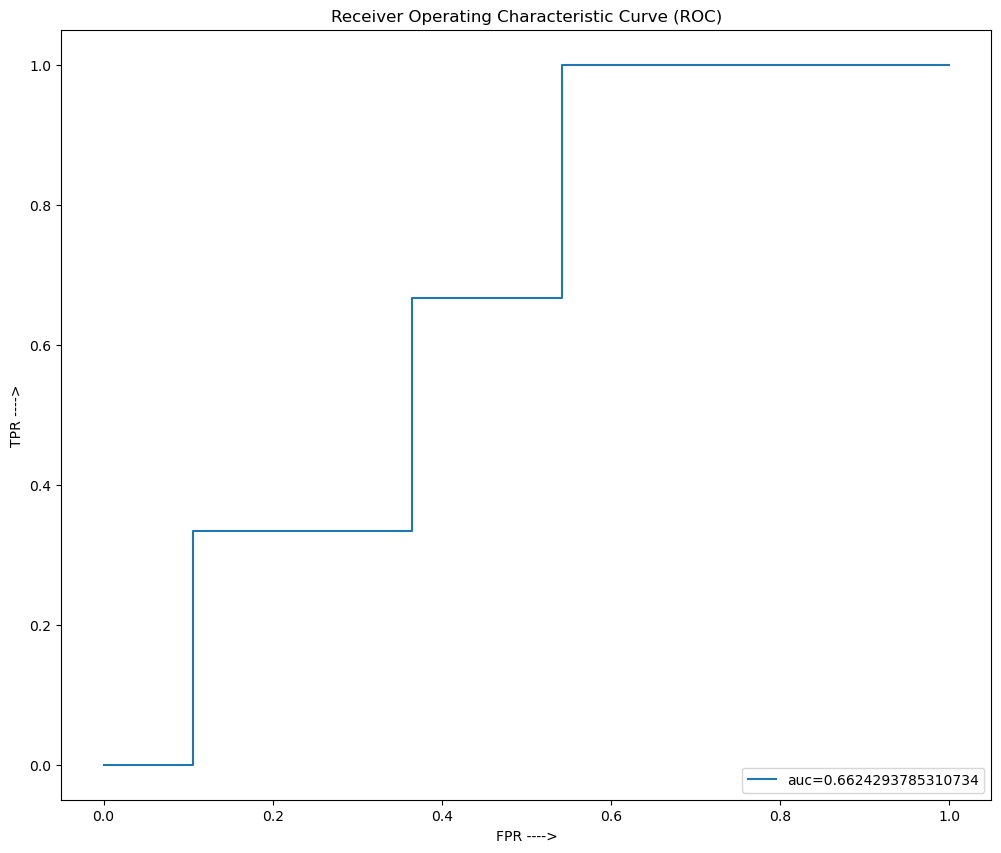

In [797]:
y_pred_proba = log_reg.predict_proba(xtest1)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest1,  y_pred_proba)
auc = metrics.roc_auc_score(ytest1, y_pred_proba)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

# travel type ID 2

In [799]:
df2

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
0,NaN,2,83.0,448.0,NaN,NaN,01-01-2013 02:00,0,0,01-01-2013 01:39,12.924150,77.672290,12.927320,77.635750,0
1,NaN,2,1010.0,540.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 02:25,12.966910,77.749350,12.927680,77.626640,0
2,NaN,2,1301.0,1034.0,NaN,NaN,01-01-2013 03:30,0,0,01-01-2013 03:08,12.937222,77.626915,13.047926,77.597766,0
3,NaN,2,768.0,398.0,NaN,NaN,01-01-2013 05:45,0,0,01-01-2013 04:39,12.989990,77.553320,12.971430,77.639140,0
4,NaN,2,1365.0,849.0,NaN,NaN,01-01-2013 09:00,0,0,01-01-2013 07:53,12.845653,77.677925,12.954340,77.600720,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,NaN,2,585.0,1226.0,15.0,NaN,11/25/2013 0:00,0,1,11/24/2013 14:24,12.976770,77.572700,13.015080,77.677960,0
43426,NaN,2,1147.0,452.0,15.0,NaN,11/24/2013 18:00,1,0,11/24/2013 14:25,13.030640,77.649100,12.952780,77.590880,0
43427,NaN,2,393.0,466.0,15.0,NaN,11/26/2013 1:00,1,0,11/24/2013 14:30,13.199560,77.706880,13.017436,77.644580,0
43429,NaN,2,1263.0,542.0,15.0,NaN,11/24/2013 16:00,0,0,11/24/2013 14:43,12.968970,77.594560,12.938230,77.622890,0


In [800]:
df2.isnull().sum()

package_id             34292
travel_type_id             0
from_area_id               0
to_area_id                 0
from_city_id           19788
to_city_id             34292
from_date                  0
online_booking             0
mobile_site_booking        0
booking_created            0
from_lat                   0
from_long                  0
to_lat                     0
to_long                    0
Car_Cancellation           0
dtype: int64

In [801]:
# Cols package_id and to_city_id have only null values as it is point to point travel
# We also need to delete the column from_city_id as it has more than 50% null values
# Also delete the column travel_type_id

df2.drop(columns = ['package_id', 'travel_type_id', 'from_city_id', 'to_city_id'], inplace = True)


In [802]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34292 entries, 0 to 43430
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   from_area_id         34292 non-null  float64
 1   to_area_id           34292 non-null  float64
 2   from_date            34292 non-null  object 
 3   online_booking       34292 non-null  int64  
 4   mobile_site_booking  34292 non-null  int64  
 5   booking_created      34292 non-null  object 
 6   from_lat             34292 non-null  float64
 7   from_long            34292 non-null  float64
 8   to_lat               34292 non-null  float64
 9   to_long              34292 non-null  float64
 10  Car_Cancellation     34292 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 3.1+ MB


In [803]:
df2['from_time_tm'] = pd.to_datetime(df2['from_date'],format='mixed').dt.strftime('%H:%M') # extracting time component from from_date column
df2['booking_created_tm'] = pd.to_datetime(df2['booking_created'],format='mixed').dt.strftime('%H:%M') # extracting time component from booking_created column

# Classifying the time into different segments for both the columns

cond = [(pd.to_datetime(df2['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(df2['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(df2['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(df2['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(df2['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(df2['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(df2['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
df2['from_date_session'] = np.select(cond,values)

cond = [(pd.to_datetime(df2['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(df2['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(df2['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(df2['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(df2['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(df2['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(df2['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
df2['booking_created_session'] = np.select(cond,values)

In [804]:
# creating a new column which calculates the time difference between booking time and scheduled travel time

df2['time_diff'] = (pd.to_datetime(df2['from_date'],format='mixed') - pd.to_datetime(df2['booking_created'],format='mixed'))
df2['time_diff_minutes'] = df2['time_diff'].dt.total_seconds() / 60

In [805]:
def cal_distance(from_lat,from_long,to_lat,to_long):
  return distance.distance((from_lat,from_long),(to_lat,to_long)).km

In [806]:
df2['distance'] = df2.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)


In [807]:
df2.drop(columns = ['from_lat', 'from_long', 'to_lat', 'to_long', 'from_date', 'booking_created', 'from_time_tm', 'booking_created_tm','time_diff'], inplace = True)
df2

,from_area_id,to_area_id,online_booking,mobile_site_booking,Car_Cancellation,from_date_session,booking_created_session,time_diff_minutes,distance
0,83.0,448.0,0,0,0,Late Night,Late Night,21.0,3.980687
1,1010.0,540.0,0,0,0,Morning,Late Night,395.0,14.004432
2,1301.0,1034.0,0,0,0,Late Night,Late Night,22.0,12.648909
3,768.0,398.0,0,0,0,Early Morning,Late Night,66.0,9.534596
4,1365.0,849.0,0,0,0,Morning,Early Morning,67.0,14.655467
...,...,...,...,...,...,...,...,...,...
43425,585.0,1226.0,0,1,0,Night,Afternoon,576.0,12.180435
43426,1147.0,452.0,1,0,0,Evening,Afternoon,215.0,10.681284
43427,393.0,466.0,1,0,0,Late Night,Afternoon,2070.0,21.251031
43429,1263.0,542.0,0,0,0,Afternoon,Afternoon,77.0,4.584142


In [808]:
#sns.heatmap(df2.corr(), annot = True, cmap = 'RdYlGn')

In [809]:
x2 = df2.drop(columns = 'Car_Cancellation')
x2.head()

,from_area_id,to_area_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes,distance
0,83.0,448.0,0,0,Late Night,Late Night,21.0,3.980687
1,1010.0,540.0,0,0,Morning,Late Night,395.0,14.004432
2,1301.0,1034.0,0,0,Late Night,Late Night,22.0,12.648909
3,768.0,398.0,0,0,Early Morning,Late Night,66.0,9.534596
4,1365.0,849.0,0,0,Morning,Early Morning,67.0,14.655467


In [810]:
y2 = df2['Car_Cancellation']
y2.head()

0    0
1    0
2    0
3    0
4    0
Name: Car_Cancellation, dtype: int64

In [811]:
y2.value_counts()

Car_Cancellation
0    31517
1     2775
Name: count, dtype: int64

In [812]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(x2,y2,train_size=0.85,random_state=30,stratify=y2)
xtrain2

,from_area_id,to_area_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes,distance
33932,393.0,603.0,1,0,Afternoon,Afternoon,70.0,27.101348
39241,934.0,580.0,1,0,Afternoon,Morning,232.0,5.586024
34494,585.0,292.0,0,0,Late Night,Evening,575.0,7.394413
11001,271.0,393.0,0,0,Night,Afternoon,629.0,27.839323
41878,1084.0,1365.0,1,0,Early Morning,Early Morning,125.0,11.651155
...,...,...,...,...,...,...,...,...
39823,393.0,1312.0,1,0,Early Morning,Morning,1309.0,40.141386
19293,1133.0,585.0,1,0,Late Night,Night,409.0,12.927710
5192,296.0,463.0,0,0,Evening,Evening,154.0,2.006471
17549,1330.0,1384.0,0,0,Afternoon,Morning,118.0,19.269351


In [813]:
xtest2

,from_area_id,to_area_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes,distance
28557,450.0,393.0,0,1,Afternoon,Night,928.0,30.708322
2485,420.0,243.0,1,0,Afternoon,Afternoon,198.0,39.550558
41952,1304.0,97.0,0,0,Early Morning,Evening,728.0,5.736785
29803,603.0,393.0,0,0,Morning,Morning,164.0,27.101348
42048,393.0,1096.0,0,1,Evening,Afternoon,355.0,25.963706
...,...,...,...,...,...,...,...,...
34720,137.0,393.0,0,0,Afternoon,Afternoon,90.0,42.529539
16763,912.0,572.0,0,0,Evening,Morning,475.0,0.909450
37255,393.0,1074.0,1,0,Late Night,Evening,460.0,27.356404
27580,269.0,97.0,1,0,Morning,Evening,774.0,3.364113


In [814]:
xtrain2['time_diff_minutes'] = m2s.fit_transform(xtrain2[['time_diff_minutes']])
xtrain2.head()

,from_area_id,to_area_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes,distance
33932,393.0,603.0,1,0,Afternoon,Afternoon,0.012471,27.101348
39241,934.0,580.0,1,0,Afternoon,Morning,0.013870,5.586024
34494,585.0,292.0,0,0,Late Night,Evening,0.016832,7.394413
11001,271.0,393.0,0,0,Night,Afternoon,0.017299,27.839323
41878,1084.0,1365.0,1,0,Early Morning,Early Morning,0.012946,11.651155


In [815]:
xtest2['time_diff_minutes'] = m2s.transform(xtest2[['time_diff_minutes']])
xtest2.head()

,from_area_id,to_area_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes,distance
28557,450.0,393.0,0,1,Afternoon,Night,0.019881,30.708322
2485,420.0,243.0,1,0,Afternoon,Afternoon,0.013577,39.550558
41952,1304.0,97.0,0,0,Early Morning,Evening,0.018154,5.736785
29803,603.0,393.0,0,0,Morning,Morning,0.013283,27.101348
42048,393.0,1096.0,0,1,Evening,Afternoon,0.014932,25.963706


In [816]:
# One-hot encoding for the columns from_date_session and booking_created_session

from_date_dummy_2 = pd.get_dummies(xtrain2['from_date_session'], drop_first=True)
from_date_dummy_2 = from_date_dummy_2.astype(int)
from_date_dummy_2

,Early Morning,Evening,Late Night,Morning,Night
33932,0,0,0,0,0
39241,0,0,0,0,0
34494,0,0,1,0,0
11001,0,0,0,0,1
41878,1,0,0,0,0
...,...,...,...,...,...
39823,1,0,0,0,0
19293,0,0,1,0,0
5192,0,1,0,0,0
17549,0,0,0,0,0


In [817]:
xtrain2['Early_Morning'] = from_date_dummy_2['Early Morning']
xtrain2['Evening'] = from_date_dummy_2['Evening']
xtrain2['Late_Night'] = from_date_dummy_2['Late Night']
xtrain2['Morning'] = from_date_dummy_2['Morning']
xtrain2['Night'] = from_date_dummy_2['Night']
del xtrain2['from_date_session']

In [818]:
booking_created_dummy_2 = pd.get_dummies(xtrain2['booking_created_session'], drop_first=True)
booking_created_dummy_2 = booking_created_dummy_2.astype(int)
booking_created_dummy_2

,Early Morning,Evening,Late Night,Morning,Night
33932,0,0,0,0,0
39241,0,0,0,1,0
34494,0,1,0,0,0
11001,0,0,0,0,0
41878,1,0,0,0,0
...,...,...,...,...,...
39823,0,0,0,1,0
19293,0,0,0,0,1
5192,0,1,0,0,0
17549,0,0,0,1,0


In [819]:
xtrain2['Early_Morning_booking'] = booking_created_dummy_2['Early Morning']
xtrain2['Evening_booking'] = booking_created_dummy_2['Evening']
xtrain2['Late_Night_booking'] = booking_created_dummy_2['Late Night']
xtrain2['Morning_booking'] = booking_created_dummy_2['Morning']
xtrain2['Night_booking'] = booking_created_dummy_2['Night']
del xtrain2['booking_created_session']

In [820]:
xtrain2

,from_area_id,to_area_id,online_booking,mobile_site_booking,time_diff_minutes,distance,Early_Morning,Evening,Late_Night,Morning,Night,Early_Morning_booking,Evening_booking,Late_Night_booking,Morning_booking,Night_booking
33932,393.0,603.0,1,0,0.012471,27.101348,0,0,0,0,0,0,0,0,0,0
39241,934.0,580.0,1,0,0.013870,5.586024,0,0,0,0,0,0,0,0,1,0
34494,585.0,292.0,0,0,0.016832,7.394413,0,0,1,0,0,0,1,0,0,0
11001,271.0,393.0,0,0,0.017299,27.839323,0,0,0,0,1,0,0,0,0,0
41878,1084.0,1365.0,1,0,0.012946,11.651155,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39823,393.0,1312.0,1,0,0.023172,40.141386,1,0,0,0,0,0,0,0,1,0
19293,1133.0,585.0,1,0,0.015399,12.927710,0,0,1,0,0,0,0,0,0,1
5192,296.0,463.0,0,0,0.013197,2.006471,0,1,0,0,0,0,1,0,0,0
17549,1330.0,1384.0,0,0,0.012886,19.269351,0,0,0,0,0,0,0,0,1,0


In [821]:
from_date_dummy_test_2 = pd.get_dummies(xtest2['from_date_session'], drop_first=True)
from_date_dummy_test_2 = from_date_dummy_test_2.astype(int)
from_date_dummy_test_2

,Early Morning,Evening,Late Night,Morning,Night
28557,0,0,0,0,0
2485,0,0,0,0,0
41952,1,0,0,0,0
29803,0,0,0,1,0
42048,0,1,0,0,0
...,...,...,...,...,...
34720,0,0,0,0,0
16763,0,1,0,0,0
37255,0,0,1,0,0
27580,0,0,0,1,0


In [822]:
xtest2['Early_Morning'] = from_date_dummy_test_2['Early Morning']
xtest2['Evening'] = from_date_dummy_test_2['Evening']
xtest2['Late_Night'] = from_date_dummy_test_2['Late Night']
xtest2['Morning'] = from_date_dummy_test_2['Morning']
xtest2['Night'] = from_date_dummy_test_2['Night']
del xtest2['from_date_session']

In [823]:
booking_created_dummy_test_2 = pd.get_dummies(xtest2['booking_created_session'], drop_first=True)
booking_created_dummy_test_2 = booking_created_dummy_test_2.astype(int)
booking_created_dummy_test_2

,Early Morning,Evening,Late Night,Morning,Night
28557,0,0,0,0,1
2485,0,0,0,0,0
41952,0,1,0,0,0
29803,0,0,0,1,0
42048,0,0,0,0,0
...,...,...,...,...,...
34720,0,0,0,0,0
16763,0,0,0,1,0
37255,0,1,0,0,0
27580,0,1,0,0,0


In [824]:
xtest2['Early_Morning_booking'] = booking_created_dummy_test_2['Early Morning']
xtest2['Evening_booking'] = booking_created_dummy_test_2['Evening']
xtest2['Late_Night_booking'] = booking_created_dummy_test_2['Late Night']
xtest2['Morning_booking'] = booking_created_dummy_test_2['Morning']
xtest2['Night_booking'] = booking_created_dummy_test_2['Night']
del xtest2['booking_created_session']

In [825]:
xtest2

,from_area_id,to_area_id,online_booking,mobile_site_booking,time_diff_minutes,distance,Early_Morning,Evening,Late_Night,Morning,Night,Early_Morning_booking,Evening_booking,Late_Night_booking,Morning_booking,Night_booking
28557,450.0,393.0,0,1,0.019881,30.708322,0,0,0,0,0,0,0,0,0,1
2485,420.0,243.0,1,0,0.013577,39.550558,0,0,0,0,0,0,0,0,0,0
41952,1304.0,97.0,0,0,0.018154,5.736785,1,0,0,0,0,0,1,0,0,0
29803,603.0,393.0,0,0,0.013283,27.101348,0,0,0,1,0,0,0,0,1,0
42048,393.0,1096.0,0,1,0.014932,25.963706,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34720,137.0,393.0,0,0,0.012644,42.529539,0,0,0,0,0,0,0,0,0,0
16763,912.0,572.0,0,0,0.015969,0.909450,0,1,0,0,0,0,0,0,1,0
37255,393.0,1074.0,1,0,0.015839,27.356404,0,0,1,0,0,0,1,0,0,0
27580,269.0,97.0,1,0,0.018551,3.364113,0,0,0,1,0,0,1,0,0,0


In [826]:
# Logistic Regression

log_reg_2 = LogisticRegression(random_state=0)
log_reg_2.fit(xtrain2, ytrain2)

LogisticRegression(random_state=0)

In [827]:
# Decision Tree

dtc_2 = DecisionTreeClassifier(criterion='gini',random_state=4)

In [828]:
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_dtc_2 = GridSearchCV(dtc_2, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_dtc_2.fit(xtrain2, ytrain2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [829]:
gscv_dtc_2.best_params_

{'max_depth': 7, 'min_samples_split': 250}

In [830]:
dtc_2 = DecisionTreeClassifier(criterion='gini', random_state = 4, max_depth = 7, min_samples_split = 250)
dtc_2.fit(xtrain2, ytrain2)

DecisionTreeClassifier(max_depth=7, min_samples_split=250, random_state=4)

In [831]:
ypred_lr_2 =log_reg_2.predict(xtest2)
ypred_lr_2


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [832]:
ypred_dtc_2 = dtc_2.predict(xtest2)
ypred_dtc_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [833]:
conf_matrix = confusion_matrix(ytest2, ypred_lr_2)
conf_matrix

array([[4728,    0],
       [ 416,    0]], dtype=int64)

<Axes: >

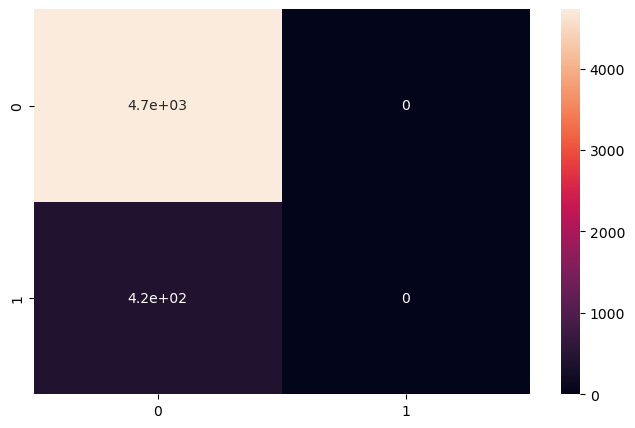

In [834]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)

In [835]:
print("Report for Logistic Regression")
print("______________________________")
print("\n")
print(classification_report(ytest2, ypred_lr_2))

Report for Logistic Regression
______________________________


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4728
           1       0.00      0.00      0.00       416

    accuracy                           0.92      5144
   macro avg       0.46      0.50      0.48      5144
weighted avg       0.84      0.92      0.88      5144



In [836]:
conf_matrix = confusion_matrix(ytest2, ypred_dtc_2)
conf_matrix

array([[4710,   18],
       [ 407,    9]], dtype=int64)

<Axes: >

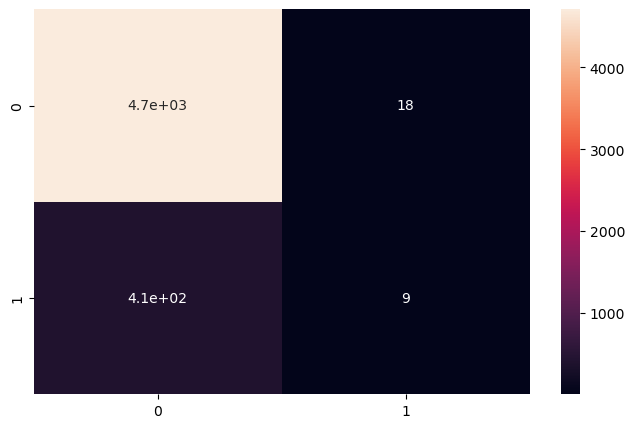

In [837]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)

In [838]:
print("Report for Decision Tree Model")
print("______________________________")
print("\n")
print(classification_report(ytest2, ypred_dtc_2))

Report for Decision Tree Model
______________________________


              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4728
           1       0.33      0.02      0.04       416

    accuracy                           0.92      5144
   macro avg       0.63      0.51      0.50      5144
weighted avg       0.87      0.92      0.88      5144



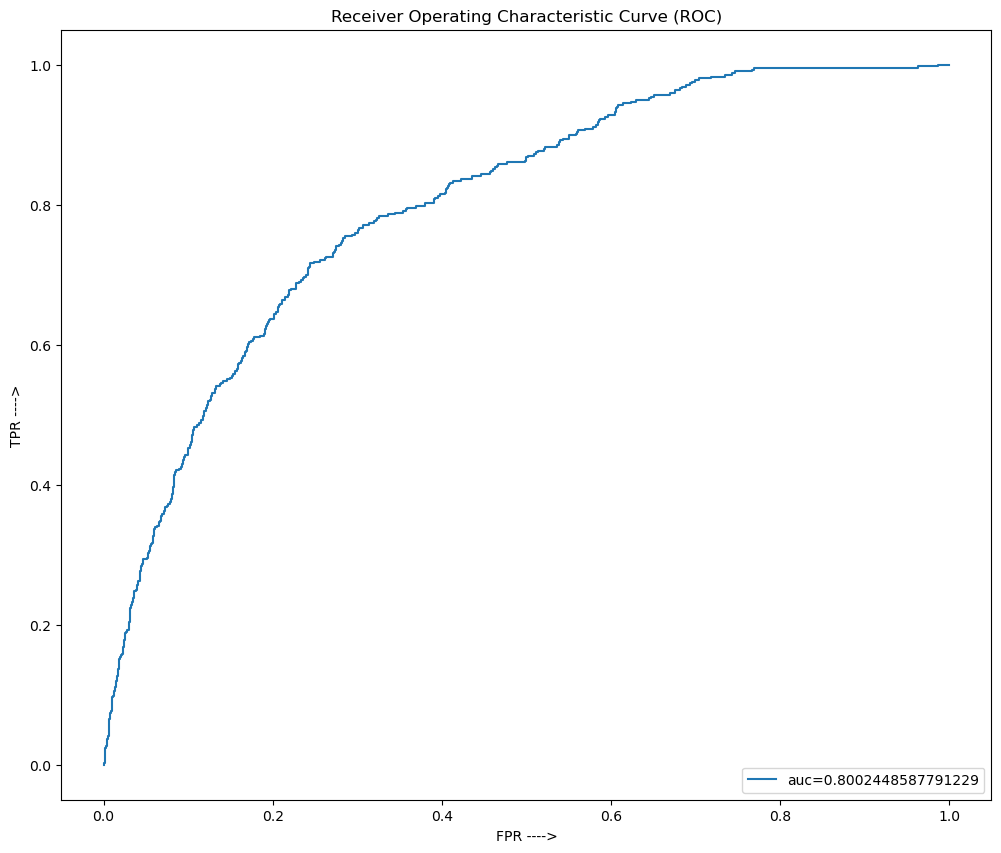

In [839]:
y_pred_proba_2 = log_reg_2.predict_proba(xtest2)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest2,  y_pred_proba_2)
auc = metrics.roc_auc_score(ytest2, y_pred_proba_2)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()

# travel type id 3

In [841]:
df3

,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation
8,2.0,3,448.0,NaN,NaN,NaN,01-01-2013 16:00,0,0,01-01-2013 09:44,12.927320,77.635750,NaN,NaN,0
20,2.0,3,471.0,NaN,NaN,NaN,01-01-2013 14:30,0,0,01-01-2013 12:52,13.018540,77.635240,NaN,NaN,0
23,1.0,3,1286.0,NaN,NaN,NaN,01-01-2013 16:30,0,0,01-01-2013 14:39,12.973448,77.620320,NaN,NaN,0
34,1.0,3,1323.0,NaN,NaN,NaN,01-01-2013 20:00,1,0,01-01-2013 17:25,12.869805,77.653211,NaN,NaN,0
47,2.0,3,142.0,NaN,NaN,NaN,01-02-2013 03:00,0,0,01-01-2013 19:37,12.912810,77.609230,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43415,1.0,3,768.0,NaN,15.0,NaN,11/24/2013 16:00,0,1,11/24/2013 12:32,12.989990,77.553320,NaN,NaN,0
43417,4.0,3,1390.0,NaN,15.0,NaN,11/24/2013 15:00,0,0,11/24/2013 13:06,12.969368,77.641302,NaN,NaN,0
43420,2.0,3,1237.0,NaN,15.0,NaN,11/25/2013 1:00,1,0,11/24/2013 13:54,12.926450,77.612060,NaN,NaN,0
43424,2.0,3,515.0,NaN,15.0,NaN,11/24/2013 15:15,0,0,11/24/2013 14:23,12.978960,77.673450,NaN,NaN,0


In [842]:
df3.isnull().sum()

package_id                0
travel_type_id            0
from_area_id              0
to_area_id             7550
from_city_id           7102
to_city_id             7550
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  0
from_long                 0
to_lat                 7550
to_long                7550
Car_Cancellation          0
dtype: int64

In [843]:
# Deleting columns having all or max null values

df3.drop(columns = ['travel_type_id', 'to_area_id', 'from_city_id', 'to_city_id', 'to_lat', 'to_long'], inplace = True)

In [844]:
# Analysing the correlation between from_area_id with from_lat and from_long
# Taking any one value of from_area_id for eg

df3.loc[df3['from_area_id'] == 448.0]

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,Car_Cancellation
8,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,12.92732,77.63575,0
811,2.0,448.0,01-11-2013 12:30,0,0,01-11-2013 09:43,12.92732,77.63575,0
3228,1.0,448.0,02-03-2013 16:00,0,0,02-03-2013 14:55,12.92732,77.63575,0
6745,1.0,448.0,03-11-2013 11:30,0,0,03-11-2013 10:37,12.92732,77.63575,0
7771,1.0,448.0,3/24/2013 10:30,0,0,3/24/2013 10:03,12.92732,77.63575,0
8214,2.0,448.0,3/29/2013 10:00,1,0,3/28/2013 18:04,12.92732,77.63575,0
8524,1.0,448.0,3/31/2013 12:45,1,0,3/31/2013 11:17,12.92732,77.63575,1
9092,1.0,448.0,04-06-2013 18:45,1,0,04-06-2013 09:44,12.92732,77.63575,0
9145,2.0,448.0,04-07-2013 06:45,0,0,04-06-2013 20:23,12.92732,77.63575,0
9259,2.0,448.0,04-09-2013 06:45,0,0,04-08-2013 07:43,12.92732,77.63575,0


In [845]:
# From the above eg, for the same value of 448 for from_area_id, we are getting the same values for from_lat and from_long so the latter 2 columns are redundent so dropping them

df3.drop(columns = ['from_lat', 'from_long'], inplace = True)
df3

,package_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,Car_Cancellation
8,2.0,448.0,01-01-2013 16:00,0,0,01-01-2013 09:44,0
20,2.0,471.0,01-01-2013 14:30,0,0,01-01-2013 12:52,0
23,1.0,1286.0,01-01-2013 16:30,0,0,01-01-2013 14:39,0
34,1.0,1323.0,01-01-2013 20:00,1,0,01-01-2013 17:25,0
47,2.0,142.0,01-02-2013 03:00,0,0,01-01-2013 19:37,0
...,...,...,...,...,...,...,...
43415,1.0,768.0,11/24/2013 16:00,0,1,11/24/2013 12:32,0
43417,4.0,1390.0,11/24/2013 15:00,0,0,11/24/2013 13:06,0
43420,2.0,1237.0,11/25/2013 1:00,1,0,11/24/2013 13:54,0
43424,2.0,515.0,11/24/2013 15:15,0,0,11/24/2013 14:23,0


In [846]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7550 entries, 8 to 43428
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   package_id           7550 non-null   float64
 1   from_area_id         7550 non-null   float64
 2   from_date            7550 non-null   object 
 3   online_booking       7550 non-null   int64  
 4   mobile_site_booking  7550 non-null   int64  
 5   booking_created      7550 non-null   object 
 6   Car_Cancellation     7550 non-null   int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 471.9+ KB


In [847]:
df3['from_time_tm'] = pd.to_datetime(df3['from_date'],format='mixed').dt.strftime('%H:%M') # extracting time component from from_date column
df3['booking_created_tm'] = pd.to_datetime(df3['booking_created'],format='mixed').dt.strftime('%H:%M') # extracting time component from booking_created column

# Classifying the time into different segments for both the columns

cond = [(pd.to_datetime(df3['from_time_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(df3['from_time_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(df3['from_time_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(df3['from_time_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(df3['from_time_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(df3['from_time_tm']).dt.hour==0)),
        (pd.to_datetime(df3['from_time_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
df3['from_date_session'] = np.select(cond,values)

cond = [(pd.to_datetime(df3['booking_created_tm']).dt.hour.between(5, 8)),
        (pd.to_datetime(df3['booking_created_tm']).dt.hour.between(9, 12)),
        (pd.to_datetime(df3['booking_created_tm']).dt.hour.between(13, 16)),
        (pd.to_datetime(df3['booking_created_tm']).dt.hour.between(17, 20)),
        ((pd.to_datetime(df3['booking_created_tm']).dt.hour.between(21, 24)) | (pd.to_datetime(df3['booking_created_tm']).dt.hour==0)),
        (pd.to_datetime(df3['booking_created_tm']).dt.hour.between(1, 4))]
values = ['Early Morning','Morning','Afternoon','Evening','Night','Late Night']
df3['booking_created_session'] = np.select(cond,values)

In [849]:
# creating a new column which calculates the time difference between booking time and scheduled travel time

df3['time_diff'] = (pd.to_datetime(df3['from_date'],format='mixed') - pd.to_datetime(df3['booking_created'],format='mixed'))
df3['time_diff_minutes'] = df3['time_diff'].dt.total_seconds() / 60

In [851]:
df3.drop(columns = ['from_date', 'booking_created', 'from_time_tm', 'booking_created_tm','time_diff'], inplace = True)

In [853]:
df3

,package_id,from_area_id,online_booking,mobile_site_booking,Car_Cancellation,from_date_session,booking_created_session,time_diff_minutes
8,2.0,448.0,0,0,0,Afternoon,Morning,376.0
20,2.0,471.0,0,0,0,Afternoon,Morning,98.0
23,1.0,1286.0,0,0,0,Afternoon,Afternoon,111.0
34,1.0,1323.0,1,0,0,Evening,Evening,155.0
47,2.0,142.0,0,0,0,Late Night,Evening,443.0
...,...,...,...,...,...,...,...,...
43415,1.0,768.0,0,1,0,Afternoon,Morning,208.0
43417,4.0,1390.0,0,0,0,Afternoon,Afternoon,114.0
43420,2.0,1237.0,1,0,0,Late Night,Afternoon,666.0
43424,2.0,515.0,0,0,0,Afternoon,Afternoon,52.0


In [855]:
x3 = df3.drop(columns = 'Car_Cancellation')
x3.head()

,package_id,from_area_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes
8,2.0,448.0,0,0,Afternoon,Morning,376.0
20,2.0,471.0,0,0,Afternoon,Morning,98.0
23,1.0,1286.0,0,0,Afternoon,Afternoon,111.0
34,1.0,1323.0,1,0,Evening,Evening,155.0
47,2.0,142.0,0,0,Late Night,Evening,443.0


In [857]:
y3 = df3['Car_Cancellation']
y3.head()

8     0
20    0
23    0
34    0
47    0
Name: Car_Cancellation, dtype: int64

In [859]:
y3.value_counts()

Car_Cancellation
0    7214
1     336
Name: count, dtype: int64

In [861]:
xtrain3, xtest3, ytrain3, ytest3 = train_test_split(x3,y3,train_size=0.85,random_state=30,stratify=y3)
xtrain3

,package_id,from_area_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes
11683,2.0,112.0,0,0,Night,Morning,694.0
16321,2.0,1257.0,1,0,Early Morning,Evening,487.0
18906,1.0,58.0,1,0,Morning,Morning,122.0
19619,2.0,393.0,1,0,Morning,Morning,2681.0
38702,6.0,953.0,0,0,Early Morning,Afternoon,981.0
...,...,...,...,...,...,...,...
24945,2.0,1163.0,1,0,Late Night,Evening,416.0
42461,7.0,1096.0,0,0,Late Night,Evening,388.0
34083,1.0,1017.0,0,0,Evening,Afternoon,79.0
41715,4.0,1312.0,0,1,Late Night,Evening,467.0


In [863]:
xtest3

,package_id,from_area_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes
5816,1.0,293.0,0,0,Morning,Early Morning,71.0
40235,4.0,376.0,0,1,Early Morning,Night,578.0
6043,2.0,357.0,0,0,Afternoon,Morning,94.0
27029,3.0,293.0,1,0,Afternoon,Afternoon,133.0
4158,1.0,1010.0,0,0,Early Morning,Early Morning,64.0
...,...,...,...,...,...,...,...
40033,6.0,1026.0,0,0,Afternoon,Evening,1045.0
14457,1.0,344.0,0,0,Evening,Evening,204.0
36509,1.0,689.0,1,0,Early Morning,Night,643.0
37143,6.0,1085.0,0,0,Early Morning,Night,548.0


In [867]:
xtrain3['time_diff_minutes'] = m2s.fit_transform(xtrain3[['time_diff_minutes']])
xtrain3.head()

,package_id,from_area_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes
11683,2.0,112.0,0,0,Night,Morning,0.021623
16321,2.0,1257.0,1,0,Early Morning,Evening,0.016688
18906,1.0,58.0,1,0,Morning,Morning,0.007986
19619,2.0,393.0,1,0,Morning,Morning,0.068993
38702,6.0,953.0,0,0,Early Morning,Afternoon,0.028465


In [869]:
xtest3['time_diff_minutes'] = m2s.transform(xtest3[['time_diff_minutes']])
xtest3.head()

,package_id,from_area_id,online_booking,mobile_site_booking,from_date_session,booking_created_session,time_diff_minutes
5816,1.0,293.0,0,0,Morning,Early Morning,0.006771
40235,4.0,376.0,0,1,Early Morning,Night,0.018858
6043,2.0,357.0,0,0,Afternoon,Morning,0.007319
27029,3.0,293.0,1,0,Afternoon,Afternoon,0.008249
4158,1.0,1010.0,0,0,Early Morning,Early Morning,0.006604


In [871]:
# One-hot encoding for the columns from_date_session and booking_created_session

from_date_dummy_3 = pd.get_dummies(xtrain3['from_date_session'], drop_first=True)
from_date_dummy_3 = from_date_dummy_3.astype(int)
from_date_dummy_3

,Early Morning,Evening,Late Night,Morning,Night
11683,0,0,0,0,1
16321,1,0,0,0,0
18906,0,0,0,1,0
19619,0,0,0,1,0
38702,1,0,0,0,0
...,...,...,...,...,...
24945,0,0,1,0,0
42461,0,0,1,0,0
34083,0,1,0,0,0
41715,0,0,1,0,0


In [873]:
xtrain3['Early_Morning'] = from_date_dummy_3['Early Morning']
xtrain3['Evening'] = from_date_dummy_3['Evening']
xtrain3['Late_Night'] = from_date_dummy_3['Late Night']
xtrain3['Morning'] = from_date_dummy_3['Morning']
xtrain3['Night'] = from_date_dummy_3['Night']
del xtrain3['from_date_session']

In [875]:
booking_created_dummy_3 = pd.get_dummies(xtrain3['booking_created_session'], drop_first=True)
booking_created_dummy_3 = booking_created_dummy_3.astype(int)
booking_created_dummy_3

,Early Morning,Evening,Late Night,Morning,Night
11683,0,0,0,1,0
16321,0,1,0,0,0
18906,0,0,0,1,0
19619,0,0,0,1,0
38702,0,0,0,0,0
...,...,...,...,...,...
24945,0,1,0,0,0
42461,0,1,0,0,0
34083,0,0,0,0,0
41715,0,1,0,0,0


In [877]:
xtrain3['Early_Morning_booking'] = booking_created_dummy_3['Early Morning']
xtrain3['Evening_booking'] = booking_created_dummy_3['Evening']
xtrain3['Late_Night_booking'] = booking_created_dummy_3['Late Night']
xtrain3['Morning_booking'] = booking_created_dummy_3['Morning']
xtrain3['Night_booking'] = booking_created_dummy_3['Night']
del xtrain3['booking_created_session']

In [879]:
xtrain3

,package_id,from_area_id,online_booking,mobile_site_booking,time_diff_minutes,Early_Morning,Evening,Late_Night,Morning,Night,Early_Morning_booking,Evening_booking,Late_Night_booking,Morning_booking,Night_booking
11683,2.0,112.0,0,0,0.021623,0,0,0,0,1,0,0,0,1,0
16321,2.0,1257.0,1,0,0.016688,1,0,0,0,0,0,1,0,0,0
18906,1.0,58.0,1,0,0.007986,0,0,0,1,0,0,0,0,1,0
19619,2.0,393.0,1,0,0.068993,0,0,0,1,0,0,0,0,1,0
38702,6.0,953.0,0,0,0.028465,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24945,2.0,1163.0,1,0,0.014995,0,0,1,0,0,0,1,0,0,0
42461,7.0,1096.0,0,0,0.014328,0,0,1,0,0,0,1,0,0,0
34083,1.0,1017.0,0,0,0.006961,0,1,0,0,0,0,0,0,0,0
41715,4.0,1312.0,0,1,0.016211,0,0,1,0,0,0,1,0,0,0


In [881]:
from_date_dummy_test_3 = pd.get_dummies(xtest3['from_date_session'], drop_first=True)
from_date_dummy_test_3 = from_date_dummy_test_3.astype(int)
from_date_dummy_test_3

,Early Morning,Evening,Late Night,Morning,Night
5816,0,0,0,1,0
40235,1,0,0,0,0
6043,0,0,0,0,0
27029,0,0,0,0,0
4158,1,0,0,0,0
...,...,...,...,...,...
40033,0,0,0,0,0
14457,0,1,0,0,0
36509,1,0,0,0,0
37143,1,0,0,0,0


In [883]:
xtest3['Early_Morning'] = from_date_dummy_test_3['Early Morning']
xtest3['Evening'] = from_date_dummy_test_3['Evening']
xtest3['Late_Night'] = from_date_dummy_test_3['Late Night']
xtest3['Morning'] = from_date_dummy_test_3['Morning']
xtest3['Night'] = from_date_dummy_test_3['Night']
del xtest3['from_date_session']

In [885]:
booking_created_dummy_test_3 = pd.get_dummies(xtest3['booking_created_session'], drop_first=True)
booking_created_dummy_test_3 = booking_created_dummy_test_3.astype(int)
booking_created_dummy_test_3

,Early Morning,Evening,Late Night,Morning,Night
5816,1,0,0,0,0
40235,0,0,0,0,1
6043,0,0,0,1,0
27029,0,0,0,0,0
4158,1,0,0,0,0
...,...,...,...,...,...
40033,0,1,0,0,0
14457,0,1,0,0,0
36509,0,0,0,0,1
37143,0,0,0,0,1


In [887]:
xtest3['Early_Morning_booking'] = booking_created_dummy_test_3['Early Morning']
xtest3['Evening_booking'] = booking_created_dummy_test_3['Evening']
xtest3['Late_Night_booking'] = booking_created_dummy_test_3['Late Night']
xtest3['Morning_booking'] = booking_created_dummy_test_3['Morning']
xtest3['Night_booking'] = booking_created_dummy_test_3['Night']
del xtest3['booking_created_session']

In [889]:
xtest3

,package_id,from_area_id,online_booking,mobile_site_booking,time_diff_minutes,Early_Morning,Evening,Late_Night,Morning,Night,Early_Morning_booking,Evening_booking,Late_Night_booking,Morning_booking,Night_booking
5816,1.0,293.0,0,0,0.006771,0,0,0,1,0,1,0,0,0,0
40235,4.0,376.0,0,1,0.018858,1,0,0,0,0,0,0,0,0,1
6043,2.0,357.0,0,0,0.007319,0,0,0,0,0,0,0,0,1,0
27029,3.0,293.0,1,0,0.008249,0,0,0,0,0,0,0,0,0,0
4158,1.0,1010.0,0,0,0.006604,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40033,6.0,1026.0,0,0,0.029991,0,0,0,0,0,0,1,0,0,0
14457,1.0,344.0,0,0,0.009941,0,1,0,0,0,0,1,0,0,0
36509,1.0,689.0,1,0,0.020407,1,0,0,0,0,0,0,0,0,1
37143,6.0,1085.0,0,0,0.018142,1,0,0,0,0,0,0,0,0,1


In [891]:
# Logistic Regression

log_reg_3 = LogisticRegression(random_state=0)
log_reg_3.fit(xtrain3, ytrain3)

LogisticRegression(random_state=0)

In [893]:
# Decision Tree

dtc_3 = DecisionTreeClassifier(criterion='gini',random_state=4)

In [895]:
param_dist = {'max_depth': [3, 5, 6, 7], 'min_samples_split': [50, 100, 150, 200, 250]}
gscv_dtc_3 = GridSearchCV(dtc_3, cv=10, param_grid=param_dist, n_jobs=-1)
gscv_dtc_3.fit(xtrain3, ytrain3)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=4), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [897]:
gscv_dtc_3.best_params_

{'max_depth': 3, 'min_samples_split': 50}

In [899]:
dtc_3 = DecisionTreeClassifier(criterion='gini', random_state = 4, max_depth = 3, min_samples_split = 50)
dtc_3.fit(xtrain3, ytrain3)

DecisionTreeClassifier(max_depth=3, min_samples_split=50, random_state=4)

In [901]:
ypred_lr_3 =log_reg_3.predict(xtest3)
ypred_lr_3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [903]:
ypred_dtc_3 = dtc_3.predict(xtest3)
ypred_dtc_3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [905]:
conf_matrix = confusion_matrix(ytest3, ypred_lr_3)
conf_matrix

array([[1083,    0],
       [  50,    0]], dtype=int64)

<Axes: >

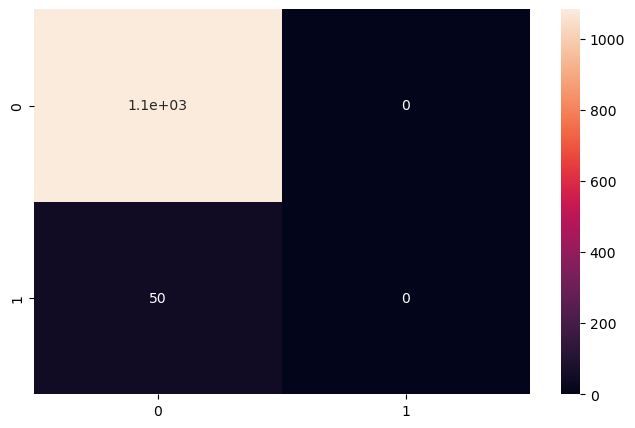

In [907]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)

In [909]:
print("Report for Logistic Regression")
print("______________________________")
print("\n")
print(classification_report(ytest3, ypred_lr_3))

Report for Logistic Regression
______________________________


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1083
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1133
   macro avg       0.48      0.50      0.49      1133
weighted avg       0.91      0.96      0.93      1133



In [911]:
conf_matrix = confusion_matrix(ytest3, ypred_dtc_3)
conf_matrix

array([[1083,    0],
       [  50,    0]], dtype=int64)

<Axes: >

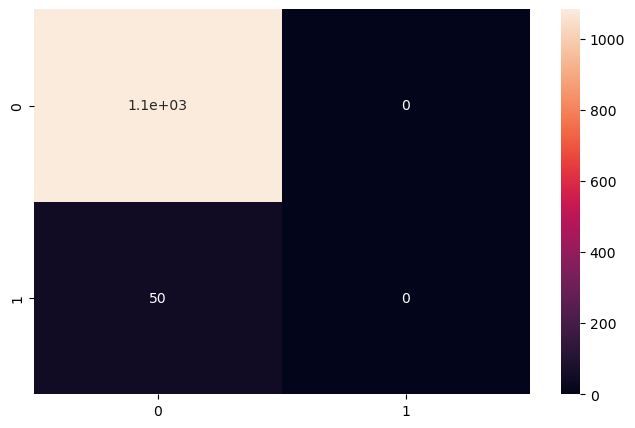

In [913]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(conf_matrix, annot = True, ax=ax)

In [915]:
print("Report for Decision Tree Model")
print("______________________________")
print("\n")
print(classification_report(ytest3, ypred_dtc_3))

Report for Decision Tree Model
______________________________


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1083
           1       0.00      0.00      0.00        50

    accuracy                           0.96      1133
   macro avg       0.48      0.50      0.49      1133
weighted avg       0.91      0.96      0.93      1133



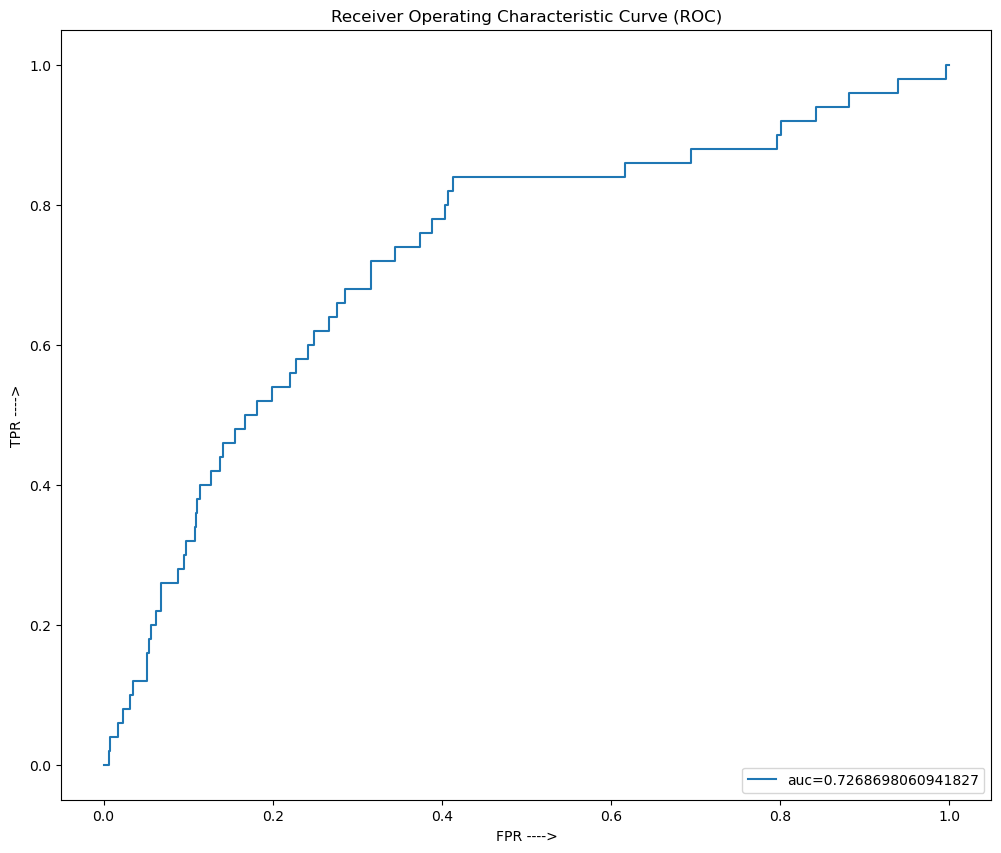

In [917]:
y_pred_proba_3 = log_reg_3.predict_proba(xtest3)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest3,  y_pred_proba_3)
auc = metrics.roc_auc_score(ytest3, y_pred_proba_3)
plt.figure(figsize=(12,10))
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.title("Receiver Operating Characteristic Curve (ROC)")
plt.xlabel("FPR ---->")
plt.ylabel("TPR ---->")
plt.show()